In [40]:
import pandas as pd
import numpy as np
from scipy.stats import wilcoxon


# Price Ranges


In [41]:
df_price_range = pd.DataFrame(columns=['AAPL', 'AMZN', 'GOOG', 'GOOGL', 'MSFT', 'TSLA'])
df_price_range['AAPL'] = ['20.83-70.58',abs(20.83-70.58)]
df_price_range['AMZN'] = ['14.31-101.63',abs(14.31-101.63)]
df_price_range['GOOG'] = ['24.80-68.75', abs(24.80-68.75)]
df_price_range['GOOGL'] = ['24.85-68.03',abs(24.85-68.03)]
df_price_range['MSFT'] = ['35.06-153.15',abs(35.06-153.15)]
df_price_range['TSLA'] = ['9.86-28.72', abs(9.86-28.72)]
df_price_range

,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA
0,20.83-70.58,14.31-101.63,24.80-68.75,24.85-68.03,35.06-153.15,9.86-28.72
1,49.75,87.32,43.95,43.18,118.09,18.86


In [42]:
def split_test_validation(df):
    dfx=df.copy()
    df_x_test=dfx[dfx['Metrics'].str.contains("Testing|testing")]
    df_x_val=dfx[dfx['Metrics'].str.contains("Validation|validation")] 
    return df_x_test, df_x_val

def show_metrics(df):
    dfx = df.copy()
    cols=dfx.columns.tolist()
    lstm_avrg_col=[]
    for row_index in range(len(dfx['Metrics'])):
        data=[]
        for ticker in cols[1:]:
            data.append(dfx[ticker][row_index])
        data=np.array(data)
        lstm_avrg_col.append(str(np.mean(data))[:5]+' ('+str(np.std(data))[:5]+')')
    dfx['Average(std)'] = lstm_avrg_col
    return split_test_validation(dfx)

def show_params(df):
    dfx = df.copy()
    cols=dfx.columns.tolist()
    lstm_avrg_col=[]
    for row_index in range(len(dfx['Architectures'])):
        data=[]
        for ticker in cols[1:]:
            data.append(dfx[ticker][row_index])
        data=np.array(data)
        lstm_avrg_col.append(float(np.mean(data)))
    dfx['Average'] = lstm_avrg_col
    return dfx
ranges=df_price_range.iloc[1].tolist()
classes=['AAPL', 'AMZN', 'GOOG', 'GOOGL', 'MSFT', 'TSLA']

## Parameters

In [78]:
df_params = pd.read_csv('metrics/params.csv')
df_param=show_params(df_params)
pd.set_option('display.float_format', '{:,.2f}'.format)
df_param

,Architectures,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA,Average
0,LSTM,174601,14613,91023,167973,181357,7813,"106,230.00"
1,BiLSTM,449161,279461,297713,154181,480025,390505,"341,841.00"
2,GRU,141857,47097,147129,103137,84057,149801,"112,179.67"
3,BiGRU,355681,103457,373441,103457,283713,33793,"208,923.67"
4,TCN,259585,177889,480801,239793,259585,483649,"316,883.67"
5,BiTCN,6977,355777,1147393,1342849,919681,782497,"759,195.67"
6,TRANSFORMER,49478,20086,19798,55718,49478,15686,"35,040.67"


# LSTM Metrics

In [44]:
df_lstm = pd.read_csv('metrics/lstm_metrics.csv')
df_lstm_testing, df_lstm_validation = show_metrics(df_lstm)
df_lstm_testing

,Metrics,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA,Average(std)
0,Testing-MSE,8.20,76.80,8.70,4.57,58.85,9.34,27.74 (28.85)
2,testing-MAE,2.25,6.02,2.24,1.61,5.88,2.38,3.397 (1.819)
4,testing-mape,5.91,11.96,5.68,3.80,6.98,11.81,7.690 (3.113)
6,testing-RMSE,2.56,6.58,2.51,1.89,6.37,2.62,3.755 (1.938)
8,testing-MPE,-1.24,11.69,3.05,2.49,6.48,-6.51,2.661 (5.708)


### STD

In [45]:
df_std_lstm = pd.read_csv('metrics/lstm_std_metrics.csv')
df_std_lstm_testing, df_std_lstm_validation = split_test_validation(df_std_lstm)
df_std_lstm_testing

,Metrics,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA
0,Testing-MSE,6.77,132.38,10.86,5.36,74.85,8.47
2,testing-MAE,3.77,8.89,5.62,3.13,3.34,6.38
4,testing-mape,1.66,21.97,3.79,4.14,8.21,6.81
6,testing-RMSE,1.54,5.84,2.51,1.13,1.53,4.70
8,testing-MPE,6.51,9.06,7.28,3.87,3.95,11.22


# Bidirectional LSTM Metrics

In [46]:
df_bilstm = pd.read_csv('metrics/bilstm_metrics.csv')
df_bilstm_testing, df_bilstm_validation = show_metrics(df_bilstm)
df_bilstm_testing

,Metrics,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA,Average(std)
0,Testing-MSE,9.22,16.08,6.72,8.13,36.29,2.13,13.09 (11.16)
2,testing-MAE,2.25,3.03,1.96,2.06,4.51,1.16,2.495 (1.052)
4,testing-mape,6.00,5.26,4.87,4.90,5.71,6.36,5.517 (0.554)
6,testing-RMSE,2.53,3.52,2.26,2.34,5.05,1.38,2.847 (1.164)
8,testing-MPE,0.57,3.36,2.84,1.54,5.15,-0.79,2.113 (1.933)


### STD

In [47]:
df_std_bilstm = pd.read_csv('metrics/bilstm_std_metrics.csv')
df_std_bilstm_testing, df_std_bilstm_validation = split_test_validation(df_std_bilstm)
df_std_bilstm_testing

,Metrics,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA
0,Testing-MSE,11.75,15.83,7.59,12.22,44.44,1.43
2,testing-MAE,4.47,2.09,4.24,5.54,3.47,2.01
4,testing-mape,2.45,11.43,1.38,2.44,9.80,0.58
6,testing-RMSE,1.94,1.98,1.20,0.92,2.44,1.78
8,testing-MPE,7.23,3.81,5.49,6.99,4.06,5.71


# GRU metrics

In [48]:
df_gru = pd.read_csv('metrics/gru_metrics.csv')
df_gru_testing, df_gru_validation = show_metrics(df_gru)
df_gru_testing

,Metrics,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA,Average(std)
0,Testing-MSE,10.97,18.67,4.67,7.15,60.71,1.78,17.32 (20.12)
2,testing-MAE,2.63,3.56,1.66,1.76,5.75,1.03,2.731 (1.570)
4,testing-mape,6.65,7.59,3.96,4.59,6.74,5.65,5.862 (1.266)
6,testing-RMSE,2.95,3.94,1.92,2.01,6.21,1.20,3.038 (1.663)
8,testing-MPE,-3.66,6.62,0.38,2.37,6.45,-2.77,1.566 (4.034)


### STD

In [49]:
df_std_gru = pd.read_csv('metrics/gru_std_metrics.csv')
df_std_gru_testing, df_std_gru_validation = split_test_validation(df_std_gru)
df_std_gru_testing

,Metrics,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA
0,Testing-MSE,9.68,13.46,5.54,14.14,106.53,1.95
2,testing-MAE,4.05,4.94,3.45,6.18,3.57,3.35
4,testing-mape,3.28,10.01,0.92,0.79,31.57,0.83
6,testing-RMSE,1.47,1.95,0.76,0.63,3.50,2.47
8,testing-MPE,6.63,5.83,5.08,7.19,3.66,5.24


# Bidirection GRU metrics

In [50]:
df_bigru = pd.read_csv('metrics/bigru_metrics.csv')
df_bigru_testing, df_bigru_validation = show_metrics(df_bigru)
df_bigru_testing

,Metrics,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA,Average(std)
0,Testing-MSE,13.89,70.29,5.57,17.58,111.93,7.28,37.75 (39.79)
2,testing-MAE,2.89,6.04,1.82,3.09,8.29,2.10,4.037 (2.343)
4,testing-mape,7.21,12.19,4.07,7.76,10.58,10.82,8.771 (2.728)
6,testing-RMSE,3.13,6.59,2.06,3.36,8.71,2.35,4.365 (2.441)
8,testing-MPE,-1.60,9.94,2.60,5.63,9.91,-4.98,3.582 (5.563)


### STD

In [51]:
df_std_bigru = pd.read_csv('metrics/bigru_std_metrics.csv')
df_std_bigru_testing, df_std_bigru_validation = split_test_validation(df_std_bigru)
df_std_bigru_testing

,Metrics,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA
0,Testing-MSE,16.57,105.18,6.40,22.50,167.60,7.94
2,testing-MAE,4.62,9.00,2.60,8.41,5.57,5.63
4,testing-mape,2.75,38.44,1.08,3.88,48.92,4.06
6,testing-RMSE,1.55,6.86,1.18,1.45,3.51,3.78
8,testing-MPE,8.20,11.28,3.71,9.90,6.35,10.68


# TCN metrics

In [52]:
df_tcn = pd.read_csv('metrics/tcn_metrics.csv')
df_tcn_testing, df_tcn_validation = show_metrics(df_tcn)
df_tcn_testing

,Metrics,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA,Average(std)
0,Testing-MSE,48.22,228.73,43.28,33.11,237.15,5.90,99.39 (95.39)
2,testing-MAE,5.26,12.85,5.31,4.86,12.68,1.93,7.148 (4.134)
4,testing-mape,17.22,27.42,10.84,12.41,17.62,10.06,15.92 (5.906)
6,testing-RMSE,5.84,13.50,5.81,5.32,13.65,2.27,7.732 (4.308)
8,testing-MPE,13.05,19.60,0.62,11.49,15.27,-2.11,9.652 (7.804)


### STD

In [53]:
df_std_tcn = pd.read_csv('metrics/tcn_std_metrics.csv')
df_std_tcn_testing, df_std_tcn_validation = split_test_validation(df_std_tcn)
df_std_tcn_testing

,Metrics,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA
0,Testing-MSE,71.09,201.36,47.43,26.26,216.49,3.80
2,testing-MAE,18.70,14.07,4.94,7.99,8.56,3.49
4,testing-mape,26.77,158.41,16.86,33.09,111.22,2.82
6,testing-RMSE,9.42,9.57,4.02,10.43,6.58,3.19
8,testing-MPE,21.02,23.43,11.36,8.88,11.07,8.80


# Bidirectional TCN metrics

In [54]:
df_bitcn = pd.read_csv('metrics/bitcn_metrics.csv')
df_bitcn_testing, df_bitcn_validation = show_metrics(df_bitcn)
df_bitcn_testing

,Metrics,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA,Average(std)
0,Testing-MSE,142.48,114.98,28.85,26.38,291.57,5.33,101.5 (98.45)
2,testing-MAE,9.03,8.75,4.53,4.35,13.28,1.89,6.971 (3.783)
4,testing-mape,39.87,18.14,12.57,10.41,22.25,11.35,19.09 (10.16)
6,testing-RMSE,10.01,9.64,5.00,4.83,14.55,2.13,7.694 (4.134)
8,testing-MPE,33.35,7.47,11.74,4.98,16.73,5.57,13.30 (9.825)


### STD

In [55]:
df_std_bitcn = pd.read_csv('metrics/bitcn_std_metrics.csv')
df_std_bitcn_testing, df_std_bitcn_validation = split_test_validation(df_std_bitcn)
df_std_bitcn_testing

,Metrics,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA
0,Testing-MSE,183.79,94.15,22.58,17.47,334.31,5.32
2,testing-MAE,50.53,11.44,8.87,6.97,20.71,5.36
4,testing-mape,66.79,45.89,15.18,14.41,105.48,2.45
6,testing-RMSE,17.53,11.66,6.23,5.50,18.80,3.49
8,testing-MPE,53.81,19.43,9.23,11.25,24.20,9.98


# Transformer metrics

In [56]:
df_trans = pd.read_csv('metrics/transformer_metrics.csv')
df_trans_testing, df_trans_validation = show_metrics(df_trans)
df_trans_testing

,Metrics,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA,Average(std)
0,Testing-MSE,14.24,37.23,11.39,103.94,58.04,7.88,38.78 (33.97)
2,testing-MAE,3.03,5.01,2.57,5.27,6.36,2.18,4.069 (1.554)
4,testing-mape,9.25,9.64,6.54,18.13,8.18,10.64,10.39 (3.684)
6,testing-RMSE,3.38,5.51,2.87,5.54,6.85,2.41,4.426 (1.626)
8,testing-MPE,3.79,8.37,5.82,17.30,7.20,-5.65,6.139 (6.774)


## std


In [57]:
df_std_trans = pd.read_csv('metrics/transformer_std_metrics.csv')
df_std_trans_testing, df_std_trans_validation = split_test_validation(df_std_trans)
df_std_trans_testing

,Metrics,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA
0,Testing-MSE,13.71,31.14,13.63,279.93,47.49,7.03
2,testing-MAE,6.78,4.82,5.98,35.46,3.85,5.89
4,testing-mape,2.17,16.85,5.98,292.71,17.74,4.69
6,testing-RMSE,2.61,2.51,2.29,36.56,3.77,3.66
8,testing-MPE,10.63,6.48,6.41,35.84,5.08,10.24


In [86]:
archs=["LSTM",'BiLSTM','GRU','BiGRU','TCN','BiTCN','TRANSFORMER']
mse=[list(df_lstm_testing['Average(std)'])[0],list(df_bilstm_testing['Average(std)'])[0],
     list(df_gru_testing['Average(std)'])[0],list(df_bigru_testing['Average(std)'])[0],
     list(df_tcn_testing['Average(std)'])[0],list(df_bitcn_testing['Average(std)'])[0],
     list(df_trans_testing['Average(std)'])[0],]
mae=[list(df_lstm_testing['Average(std)'])[1],list(df_bilstm_testing['Average(std)'])[1],
     list(df_gru_testing['Average(std)'])[1],list(df_bigru_testing['Average(std)'])[1],
     list(df_tcn_testing['Average(std)'])[1],list(df_bitcn_testing['Average(std)'])[1],
     list(df_trans_testing['Average(std)'])[1],]
mape=[list(df_lstm_testing['Average(std)'])[2],list(df_bilstm_testing['Average(std)'])[2],
     list(df_gru_testing['Average(std)'])[2],list(df_bigru_testing['Average(std)'])[2],
     list(df_tcn_testing['Average(std)'])[2],list(df_bitcn_testing['Average(std)'])[2],
     list(df_trans_testing['Average(std)'])[2],]
rmse=[list(df_lstm_testing['Average(std)'])[3],list(df_bilstm_testing['Average(std)'])[3],
     list(df_gru_testing['Average(std)'])[3],list(df_bigru_testing['Average(std)'])[3],
     list(df_tcn_testing['Average(std)'])[3],list(df_bitcn_testing['Average(std)'])[3],
     list(df_trans_testing['Average(std)'])[3],]
mpe=[list(df_lstm_testing['Average(std)'])[4],list(df_bilstm_testing['Average(std)'])[4],
     list(df_gru_testing['Average(std)'])[4],list(df_bigru_testing['Average(std)'])[4],
     list(df_tcn_testing['Average(std)'])[4],list(df_bitcn_testing['Average(std)'])[4],
     list(df_trans_testing['Average(std)'])[4],]
params=list(df_param["Average"])

df_table = pd.DataFrame(columns=['Architecture', 'MSE', 'MAE', 'MAPE', 'RMSE', 'MPE','Params'])
df_table["Architecture"]=archs
df_table['MSE']=mse
df_table['MAE']=mae
df_table['MAPE']=mape
df_table['RMSE']=rmse
df_table['MPE']=mpe
df_table['Params']=params
df_table

df_table.to_excel('/home/j/usfq/Proyecto-Integrador/StockPredictionModels/Results/tables/table.xlsx')

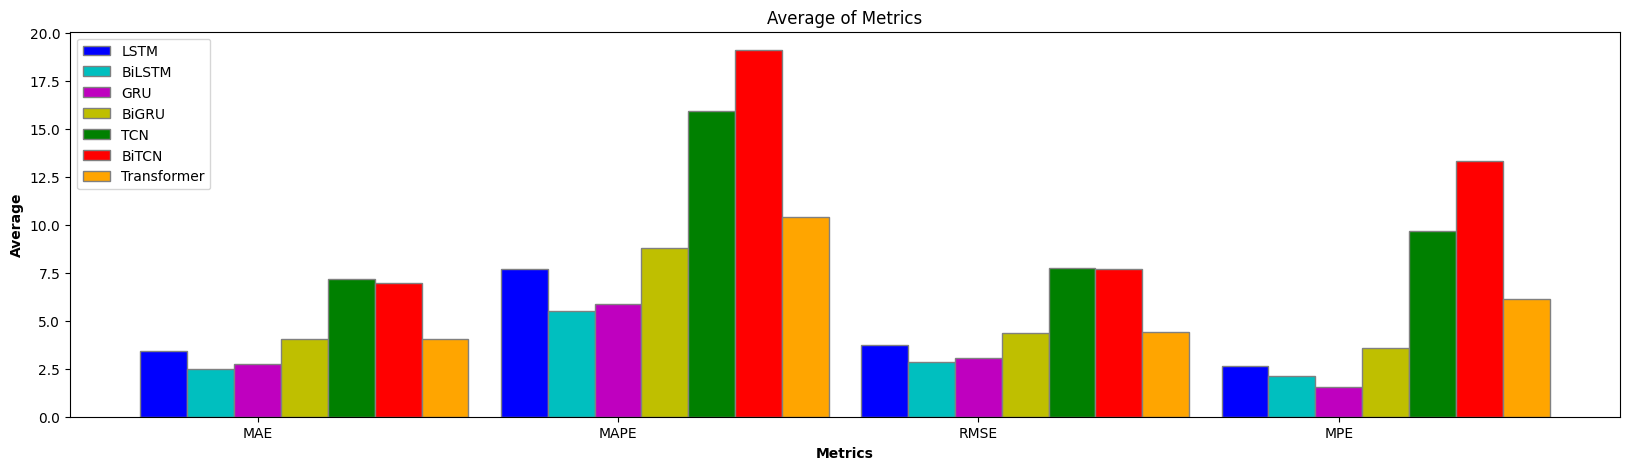

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_lstm, df_bilstm, df_gru, df_bigru, df_tcn, and df_bitcn are defined

test_metrics = ['MAE', 'MAPE', 'RMSE', 'MPE']

# Data for the stacked bar graph
#remove from values in Average(std) the portion fo the string that is in parenthesis and turn into float
lstm_data = [float(x.split(" ")[0]) for x in df_lstm_testing['Average(std)']]
bilstm_data = [float(x.split(" ")[0]) for x in df_bilstm_testing['Average(std)']]
gru_data = [float(x.split(" ")[0]) for x in df_gru_testing['Average(std)']]
bigru_data = [float(x.split(" ")[0]) for x in df_bigru_testing['Average(std)']]
tcn_data = [float(x.split(" ")[0]) for x in df_tcn_testing['Average(std)']]
bitcn_data = [float(x.split(" ")[0]) for x in df_bitcn_testing['Average(std)']]
trans_data=[float(x.split(" ")[0]) for x in df_trans_testing['Average(std)']]

barWidth = 0.13
r1 = np.arange(len(test_metrics))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]

plt.figure(figsize=(20, 5))

plt.bar(r1, lstm_data[1:], color='b', width=barWidth, edgecolor='grey', label='LSTM')
plt.bar(r2, bilstm_data[1:], color='c', width=barWidth, edgecolor='grey', label='BiLSTM')
plt.bar(r3, gru_data[1:], color='m', width=barWidth, edgecolor='grey', label='GRU')
plt.bar(r4, bigru_data[1:], color='y', width=barWidth, edgecolor='grey', label='BiGRU')
plt.bar(r5, tcn_data[1:], color='g', width=barWidth, edgecolor='grey', label='TCN')
plt.bar(r6, bitcn_data[1:], color='r', width=barWidth, edgecolor='grey', label='BiTCN')
plt.bar(r7, trans_data[1:], color='orange', width=barWidth, edgecolor='grey', label='Transformer')

plt.xlabel('Metrics', fontweight='bold')
plt.ylabel('Average', fontweight='bold')
plt.xticks([r + barWidth * 2 for r in range(len(test_metrics))], test_metrics)
plt.title('Average of Metrics')
plt.legend()
plt.show()


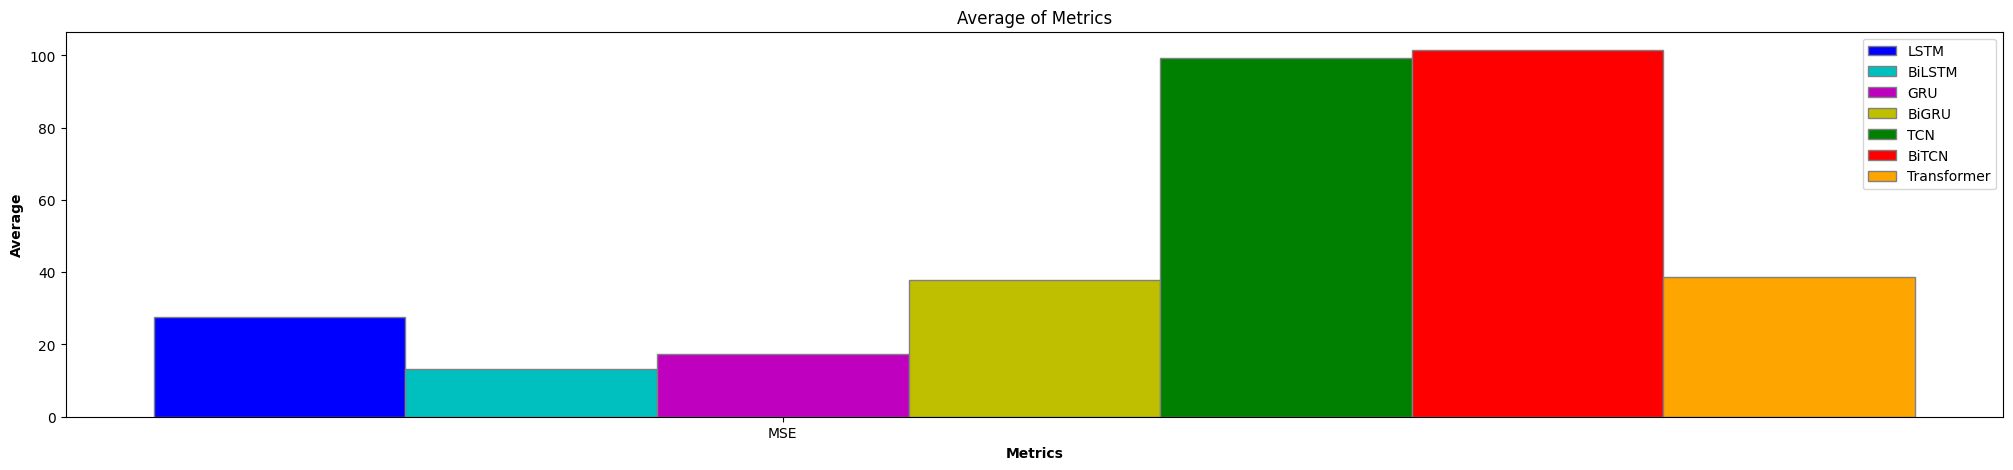

In [59]:
test_metrics = ['MSE']

# Data for the stacked bar graph
#remove from values in Average(std) the portion fo the string that is in parenthesis and turn into float
lstm_data = [float(x.split(" ")[0]) for x in df_lstm_testing['Average(std)']]
bilstm_data = [float(x.split(" ")[0]) for x in df_bilstm_testing['Average(std)']]
gru_data = [float(x.split(" ")[0]) for x in df_gru_testing['Average(std)']]
bigru_data = [float(x.split(" ")[0]) for x in df_bigru_testing['Average(std)']]
tcn_data = [float(x.split(" ")[0]) for x in df_tcn_testing['Average(std)']]
bitcn_data = [float(x.split(" ")[0]) for x in df_bitcn_testing['Average(std)']]
trans_data=[float(x.split(" ")[0]) for x in df_trans_testing['Average(std)']]

barWidth = 0.10
r1 = np.arange(len(test_metrics))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]

plt.figure(figsize=(25, 5))

plt.bar(r1, lstm_data[0], color='b', width=barWidth, edgecolor='grey', label='LSTM')
plt.bar(r2, bilstm_data[0], color='c', width=barWidth, edgecolor='grey', label='BiLSTM')
plt.bar(r3, gru_data[0], color='m', width=barWidth, edgecolor='grey', label='GRU')
plt.bar(r4, bigru_data[0], color='y', width=barWidth, edgecolor='grey', label='BiGRU')
plt.bar(r5, tcn_data[0], color='g', width=barWidth, edgecolor='grey', label='TCN')
plt.bar(r6, bitcn_data[0], color='r', width=barWidth, edgecolor='grey', label='BiTCN')
plt.bar(r7, trans_data[0], color='orange', width=barWidth, edgecolor='grey', label='Transformer')

plt.xlabel('Metrics', fontweight='bold')
plt.ylabel('Average', fontweight='bold')
plt.xticks([r + barWidth * 2 for r in range(len(test_metrics))], test_metrics)
plt.title('Average of Metrics')
plt.legend()
plt.show()


# Box Plot per metric and per company for all architectures


In [60]:
df_lstm_hyp = pd.read_csv('metrics/lstm_hypothesis.csv')
df_bilstm_hyp = pd.read_csv('metrics/bilstm_hypothesis.csv')
df_gru_hyp = pd.read_csv('metrics/gru_hypothesis.csv')
df_bigru_hyp = pd.read_csv('metrics/bigru_hypothesis.csv')
df_tcn_hyp = pd.read_csv('metrics/tcn_hypothesis.csv')
df_bitcn_hyp = pd.read_csv('metrics/bitcn_hypothesis.csv')
df_trans_hyp = pd.read_csv('metrics/transformer_hypothesis.csv')

classes=['AAPL', 'AMZN', 'GOOG', 'GOOGL', 'MSFT', 'TSLA']

['MAE', 'MAPE', 'RMSE', 'MPE']

['MAE', 'MAPE', 'RMSE', 'MPE']

In [61]:
def get_company_split(df,metric):
    data=[[],[],[],[],[],[]]
    count=0
    for value in df[metric]:
        mod=count%6
        count+=1
        data[mod].append(value)
    return data

def box_gen(df):
    metrics=['MSE','MAE', 'MAPE', 'RMSE', 'MPE']
    plt.figure(figsize=(10, 20))
    for i in range(len(metrics)):
        data=get_company_split(df,metrics[i])
        plt.subplot(len(metrics),1,i+1)
        plt.boxplot(data, labels=classes,vert=False)
        plt.xlabel('Values')
        plt.ylabel(f'{metrics[i]} Values')
        plt.title('Companies')
    plt.subplots_adjust(hspace=1)  # Adjust spacing between subplots
    plt.show()
    


## LSTM

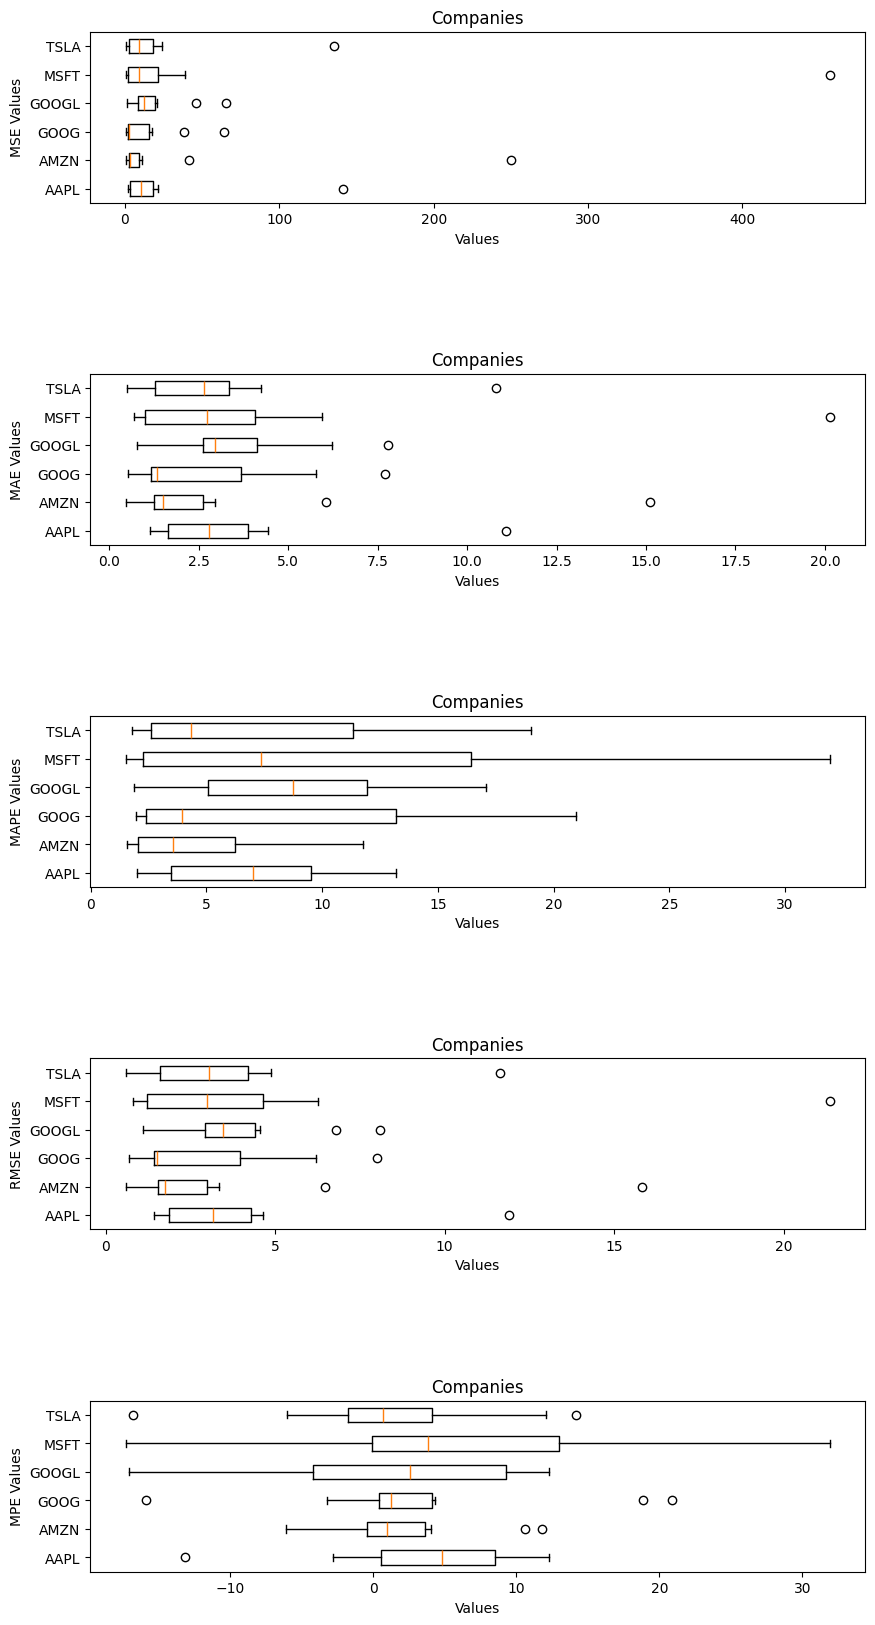

In [62]:

box_gen(df_lstm_hyp)



## Bidirectional LSTM

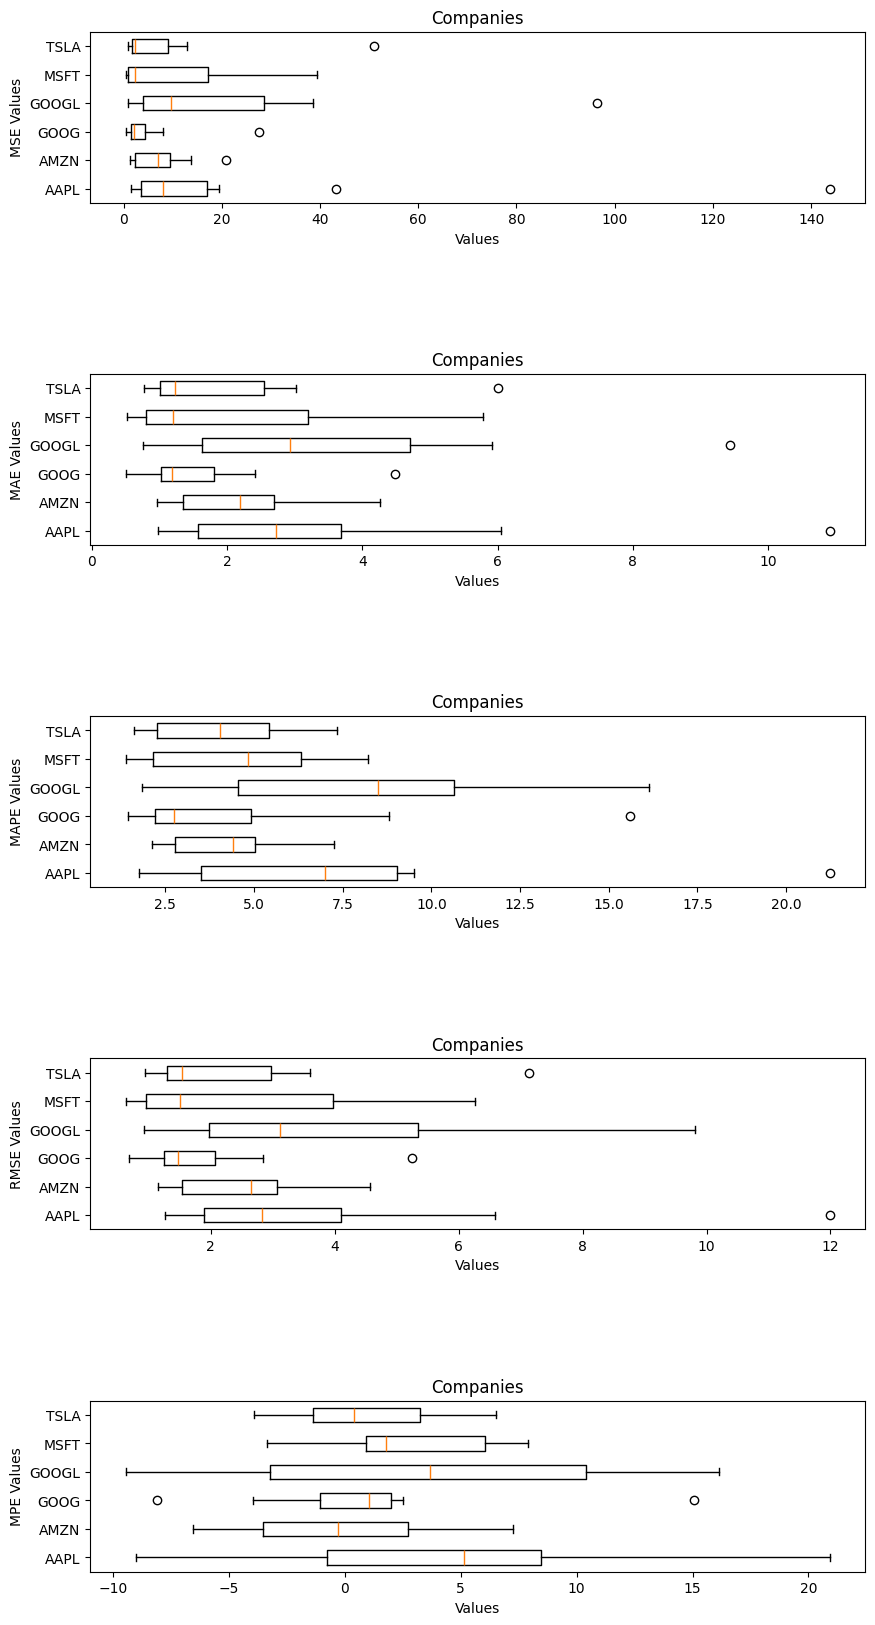

In [63]:
box_gen(df_bilstm_hyp)

## GRU

### MSE

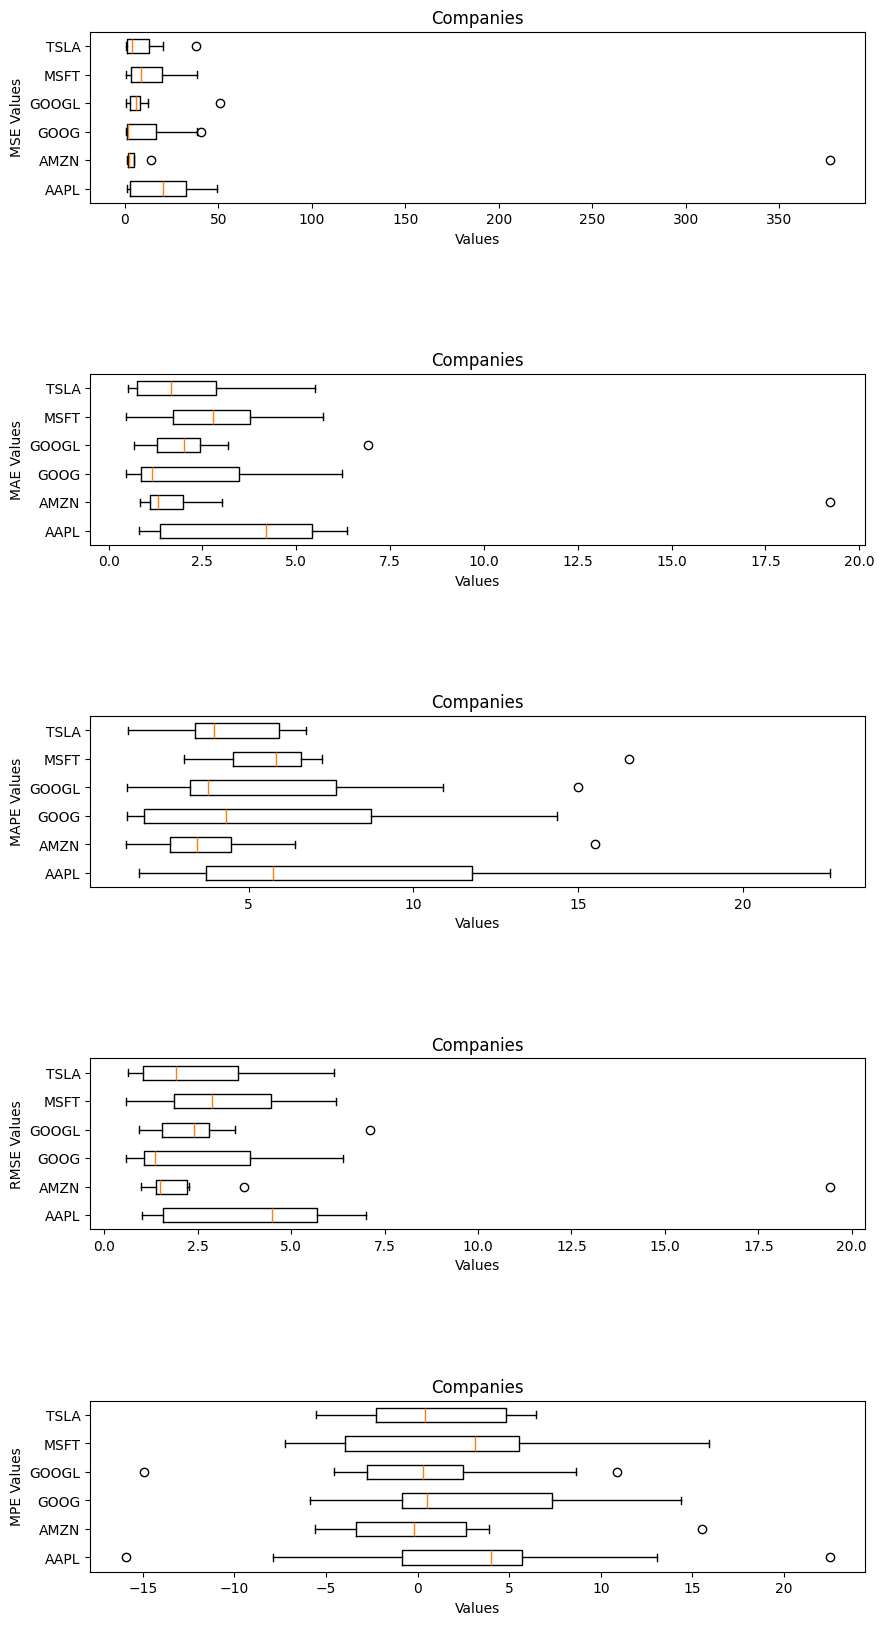

In [64]:
box_gen(df_gru_hyp)

## Bidirectional GRU

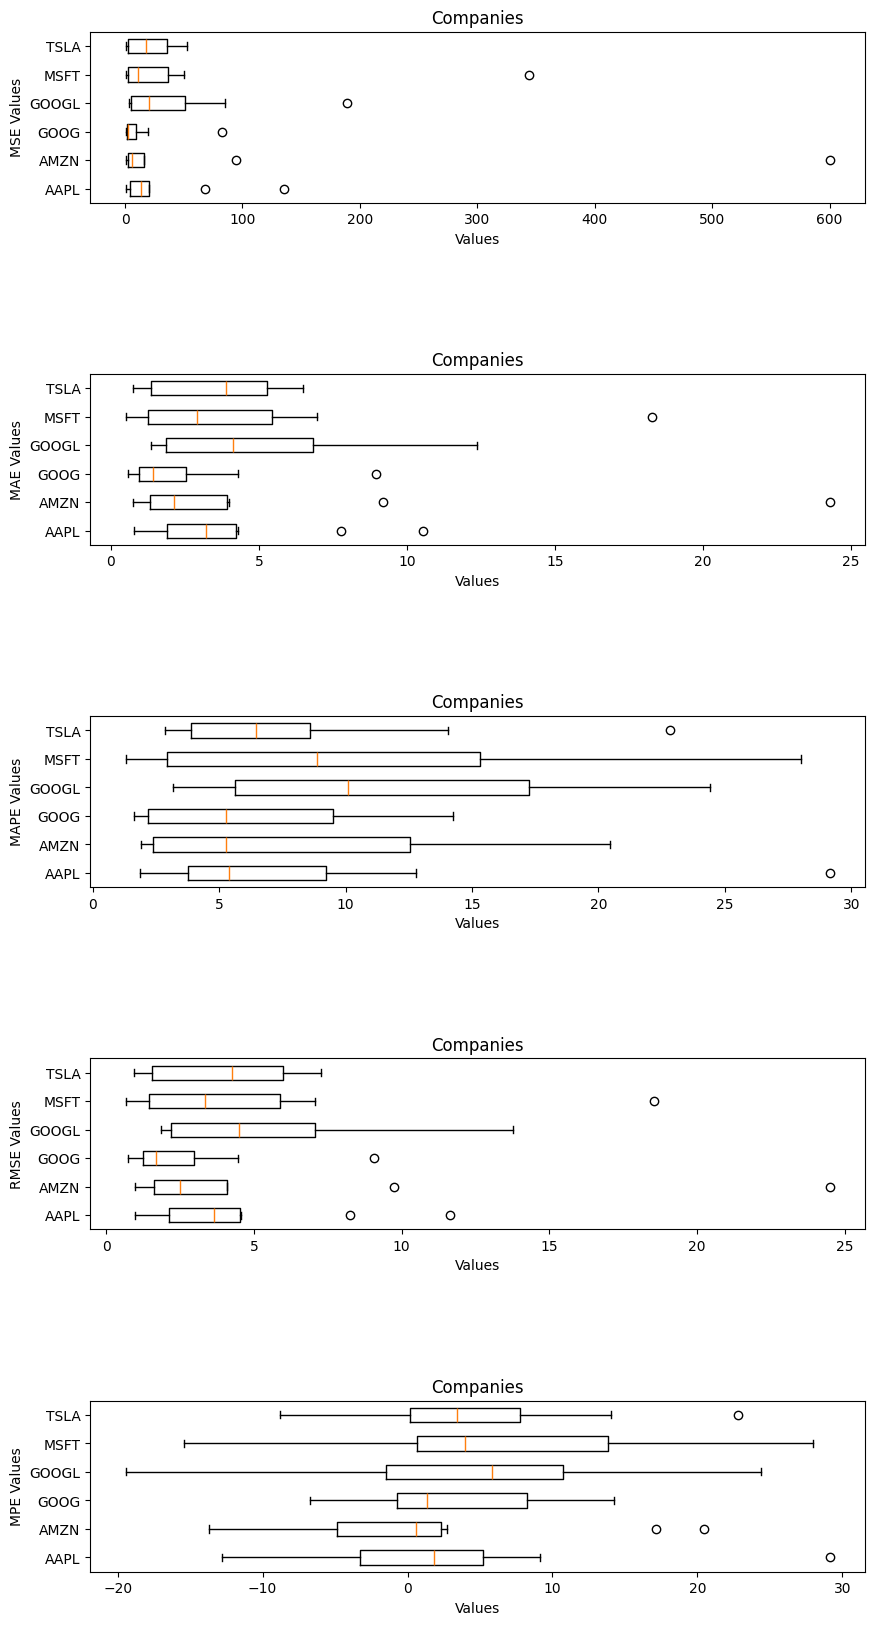

In [65]:
box_gen(df_bigru_hyp)

## TCN

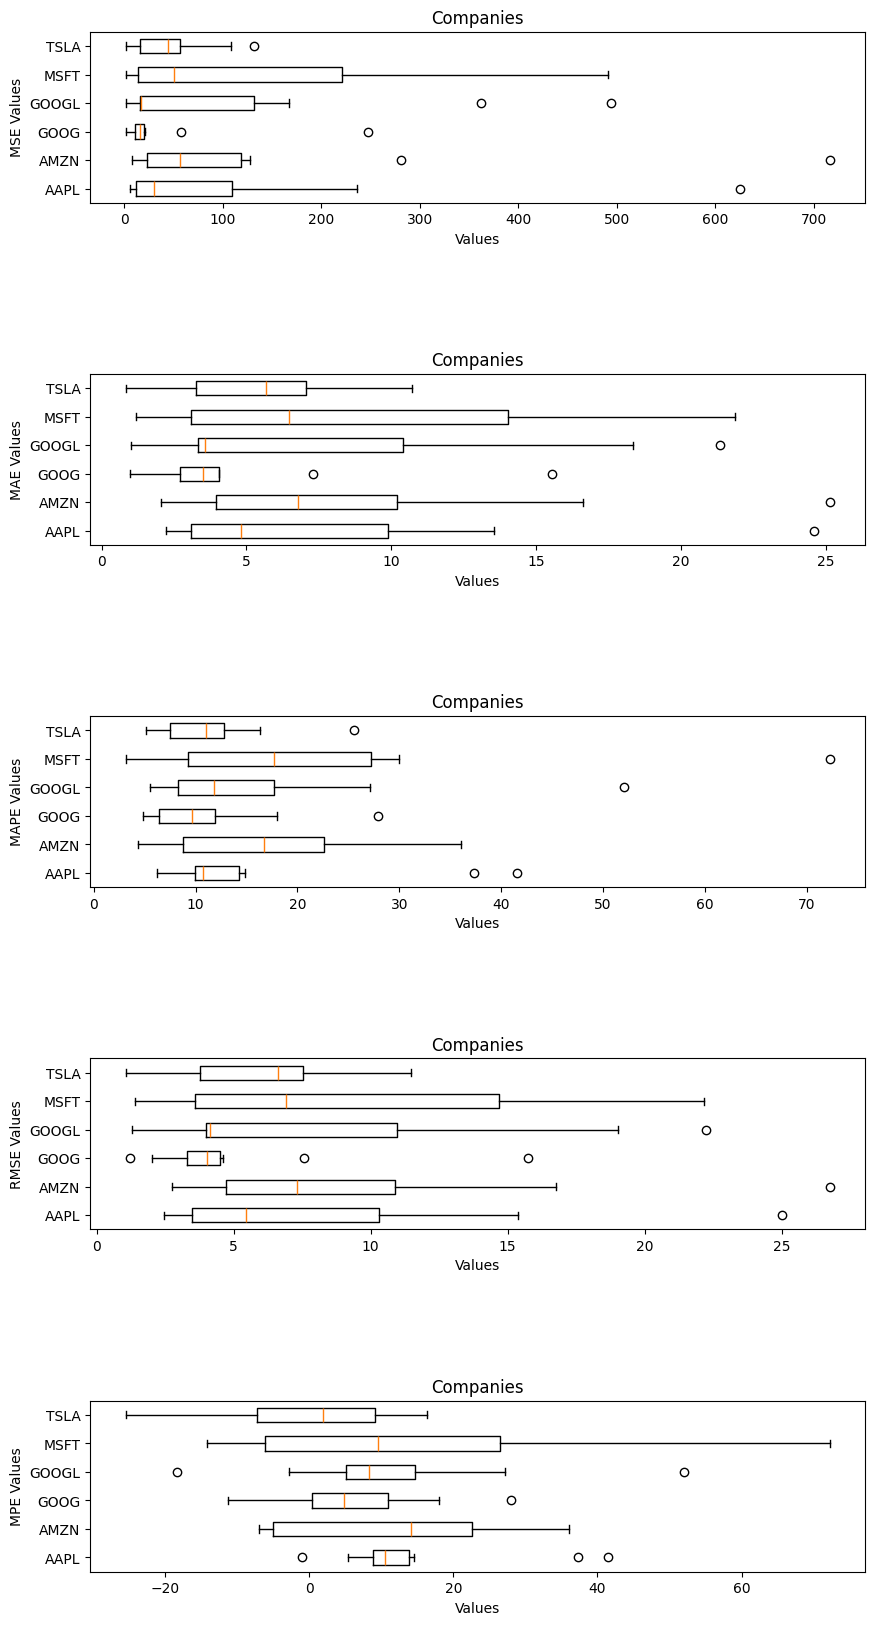

In [66]:
box_gen(df_tcn_hyp)

## Bidirectional TCN

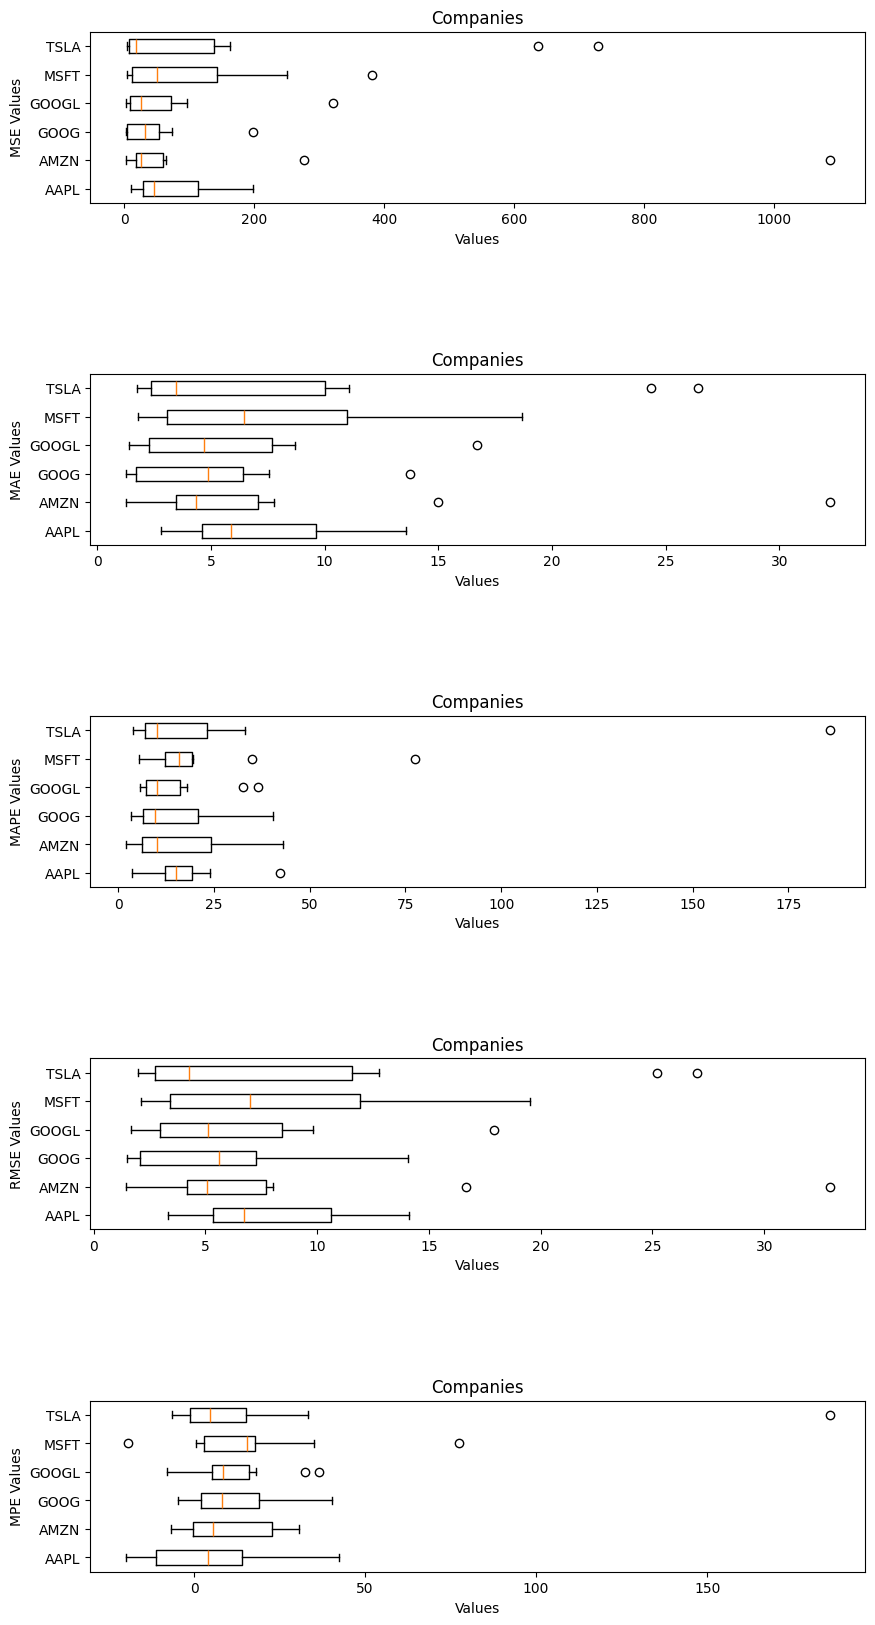

In [67]:
box_gen(df_bitcn_hyp)

# Transformer

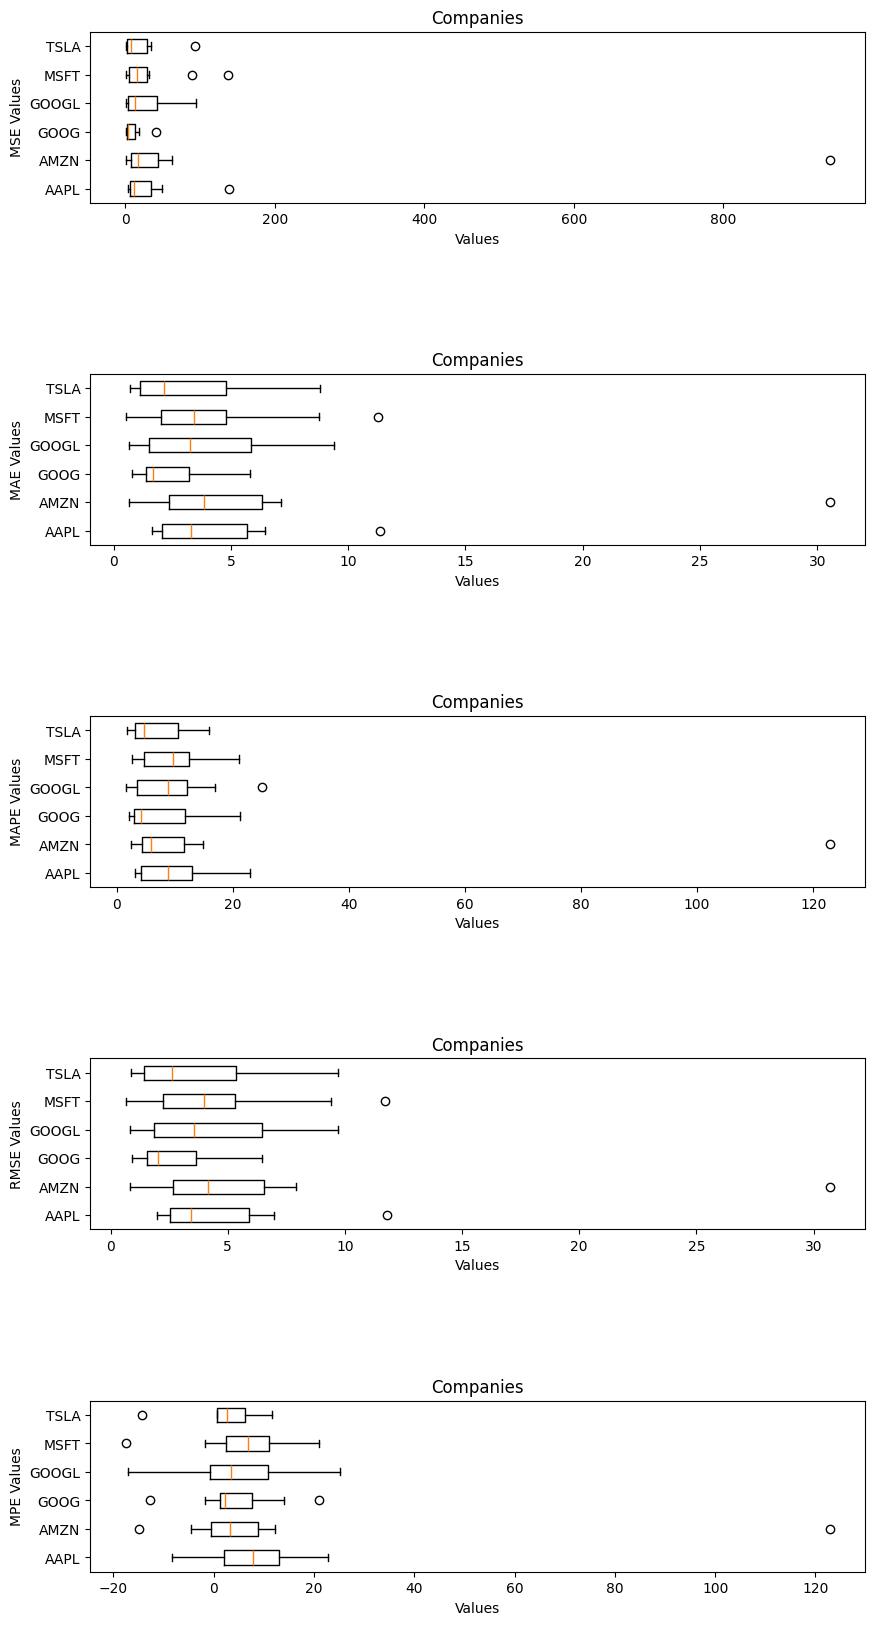

In [68]:
box_gen(df_trans_hyp)

# P Value per metric and per architecture

In [69]:
def p_per_metric(met):
    df_p_values=pd.DataFrame()
    df_p_values['Architectures']=['LSTM','BiLSTM','GRU','BiGRU','TCN','BiTCN','Transformer']
    metric=met
    ps=[]
    ps.append(wilcoxon(df_bilstm_hyp[metric],df_lstm_hyp[metric]).pvalue)
    ps.append('-')
    ps.append(wilcoxon(df_bilstm_hyp[metric],df_gru_hyp[metric]).pvalue)
    ps.append(wilcoxon(df_bilstm_hyp[metric],df_bigru_hyp[metric]).pvalue)
    ps.append(wilcoxon(df_bilstm_hyp[metric],df_tcn_hyp[metric]).pvalue)
    ps.append(wilcoxon(df_bilstm_hyp[metric],df_bitcn_hyp[metric]).pvalue)
    ps.append(wilcoxon(df_bilstm_hyp[metric],df_trans_hyp[metric]).pvalue)
    
    df_p_values['P Value']=ps
    df_p_values['Number of Parameters']=df_param['Average']

    return df_p_values

## MSE

In [70]:
p_per_metric('MSE')



,Architectures,P Value,Number of Parameters
0,LSTM,0.08,"79,116.00"
1,BiLSTM,-,"238,120.33"
2,GRU,0.66,"49,018.33"
3,BiGRU,0.00,"170,310.33"
4,TCN,0.00,"275,470.33"
5,BiTCN,0.00,"1,123,830.33"
6,Transformer,0.00,"26,992.67"


## MAE

In [71]:
p_per_metric('MAE')

,Architectures,P Value,Number of Parameters
0,LSTM,0.04,"79,116.00"
1,BiLSTM,-,"238,120.33"
2,GRU,0.74,"49,018.33"
3,BiGRU,0.00,"170,310.33"
4,TCN,0.00,"275,470.33"
5,BiTCN,0.00,"1,123,830.33"
6,Transformer,0.00,"26,992.67"


## MAPE

In [72]:
p_per_metric('MAPE')

,Architectures,P Value,Number of Parameters
0,LSTM,0.04,"79,116.00"
1,BiLSTM,-,"238,120.33"
2,GRU,0.78,"49,018.33"
3,BiGRU,0.00,"170,310.33"
4,TCN,0.00,"275,470.33"
5,BiTCN,0.00,"1,123,830.33"
6,Transformer,0.00,"26,992.67"


## RMSE


In [73]:
p_per_metric('RMSE')

,Architectures,P Value,Number of Parameters
0,LSTM,0.06,"79,116.00"
1,BiLSTM,-,"238,120.33"
2,GRU,0.67,"49,018.33"
3,BiGRU,0.00,"170,310.33"
4,TCN,0.00,"275,470.33"
5,BiTCN,0.00,"1,123,830.33"
6,Transformer,0.00,"26,992.67"


## MPE

In [74]:
p_per_metric('MPE')

,Architectures,P Value,Number of Parameters
0,LSTM,0.87,"79,116.00"
1,BiLSTM,-,"238,120.33"
2,GRU,0.10,"49,018.33"
3,BiGRU,0.31,"170,310.33"
4,TCN,0.00,"275,470.33"
5,BiTCN,0.00,"1,123,830.33"
6,Transformer,0.00,"26,992.67"
